# Muon collider based on electron-positron annilihation under acute angles

High energy collider at the moment are only capable to acclerate long life elementary particles (electrons, protons) or heavy ions. The problem of acclerating short life particles like muons is the acclerate enough of them before they decay.

In this notebook the idea of a muon collider based on electron-positron annilihation under acute angles is discussed. The main concept is that under the collisions under a acute angle, most of energy is transfered to final state particles (muon is this case). This leads to low center of mass energies, but high boosts of the muons. The muons have already a sufficient enough energy to begin with, meaning a longer life time, and have pointed and sharp flight direction. 

One other advantages is a the low center of mass energy, which can be fixed to a mass resonance, for example the J/$\psi$, to futhermore enhance the muon rate.

### Kinematics of electron-positron annilihation under acute angles

The configuration of electron-positron annilihation under acute angles is shown in the following picture. The figure shows the kinematics as the observer looks from above of the collision.

Text(4.2, 2.2, '$\\theta$')

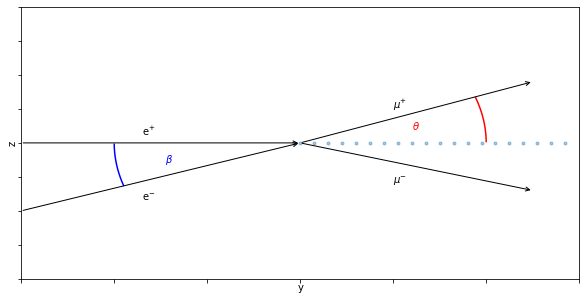

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import exp, sin, cos, tan, sqrt, linspace, meshgrid, array, inf

fig, ax = plt.subplots(figsize=(10, 5))
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
ax.set_xlabel(r"y")
ax.set_ylabel(r"z")
ax.set_xlim(0, 6)
ax.set_ylim(0, 4)

##Electrons
ax.text(1.3, 2.1, "e$^{+}$")
ax.text(1.3, 1.15, "e$^{-}$")
ax.annotate("", xytext=(0, 2), xy=(3, 2), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(0, 1), xy=(3, 2), arrowprops=dict(arrowstyle="->"))

##Muons
ax.text(4, 2.5, "$\mu^{+}$")
ax.text(4, 1.4, "$\mu^{-}$")
ax.annotate("", xytext=(3, 2), xy=(5.5, 2.9), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xytext=(3, 2), xy=(5.5, 1.3), arrowprops=dict(arrowstyle="->"))

##Angles
ax.plot([3 + 3*i/20 for i in range(20)], 20*[2], ".", alpha=0.4)

def angle(r, n):
    y = linspace(-r, r, n)
    x = array([sqrt(r**2 - y_i**2) for y_i in y])
    return x, y

x, y = angle(2, 100)
ax.plot(x[50:67]+3, y[50:67]+2, color="red")
ax.plot(-x[34:50]+3, y[34:50]+2, color="blue")

ax.text(1.55, 1.7, r"$\beta$", color="blue")
ax.text(4.2, 2.2, r"$\theta$", color="red")

The lorentz-invariant differential cross section of electron-positron annihilation to muon\anti-muon:

$\frac{d\sigma}{dt}(e^+e^- \to \mu^+\mu^-) = \frac{2\pi\alpha^2}{s^3(s-4m_e^2)}(2t^2 + 2st + s^2 - 4(m_e^2+m_\mu^2)t + 2(m_e^2 + m_\mu^2)^2)$

where s and t are the mandelstam variable:

$s = (p_{e^+} + p_{e^-})^2 = (p_{e^+})^2 + (p_{e^-})^2 + 2p_{e^-}p_{e^+} = 2m_e^2 + 2p_{e^-}p_{e^+}$

$t = (p_{e^+} - p_{\mu^+})^2 = (p_{e^+})^2 + (p_{\mu^-})^2 - 2p_{e^+}p_{\mu^-} = m_e^2 + m_\mu^2 - 2p_{e^+}p_{\mu^+}$

For general four momenta of particles with $E >> m \Rightarrow E = |\vec{p}|$:

$p_{e^+} = \begin{pmatrix}|\vec{p}_{e^+}|\\ \vec{p}_{e^+}\end{pmatrix}, \quad p_{e^-} = \begin{pmatrix}|\vec{p}_{e^-}|\\ \vec{p}_{e^-}\end{pmatrix}$

$p_{\mu^+} = \begin{pmatrix}|\vec{p}_{\mu^+}|\\ \vec{p}_{\mu^+}\end{pmatrix}, \quad p_{\mu^-} = \begin{pmatrix}|\vec{p}_{\mu^-}|\\ \vec{p}_{\mu^-}\end{pmatrix}$

With this $s$ and $t$ can be expressed as:

$s = 2m_e^2 + 2(|\vec{p}_{e^+}||\vec{p}_{e^-}| - \vec{p}_-\vec{p}_{e^+}) = 2m_e^2 + 2(|\vec{p}_{e^+}||\vec{p}_{e^-}| - |\vec{p}_{e^-}||\vec{p}_{e^+}|\cos(\beta)) = 2m_e^2 + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|(1-\cos(\beta))$

$t = m_e^2 + m_\mu^2 - 2(|\vec{p}_{e^+}||\vec{p}_{\mu^+}| - \vec{p}_{e^+}\vec{p}_{\mu^+}) = m_e^2 + m_\mu^2 - 2(\vec{p}_{e^+}||\vec{p}_{\mu^+}|  - |\vec{p}_{e^+}||\vec{p}_{\mu^+}| \cos(\theta)) = m_e^2 + m_\mu^2 - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|(1-\cos(\theta))$

Below the the center of mass energy for different positron energies in dependence of the electron energy and the collision angle $\beta$. The black line shows the mass of J/$\psi$:

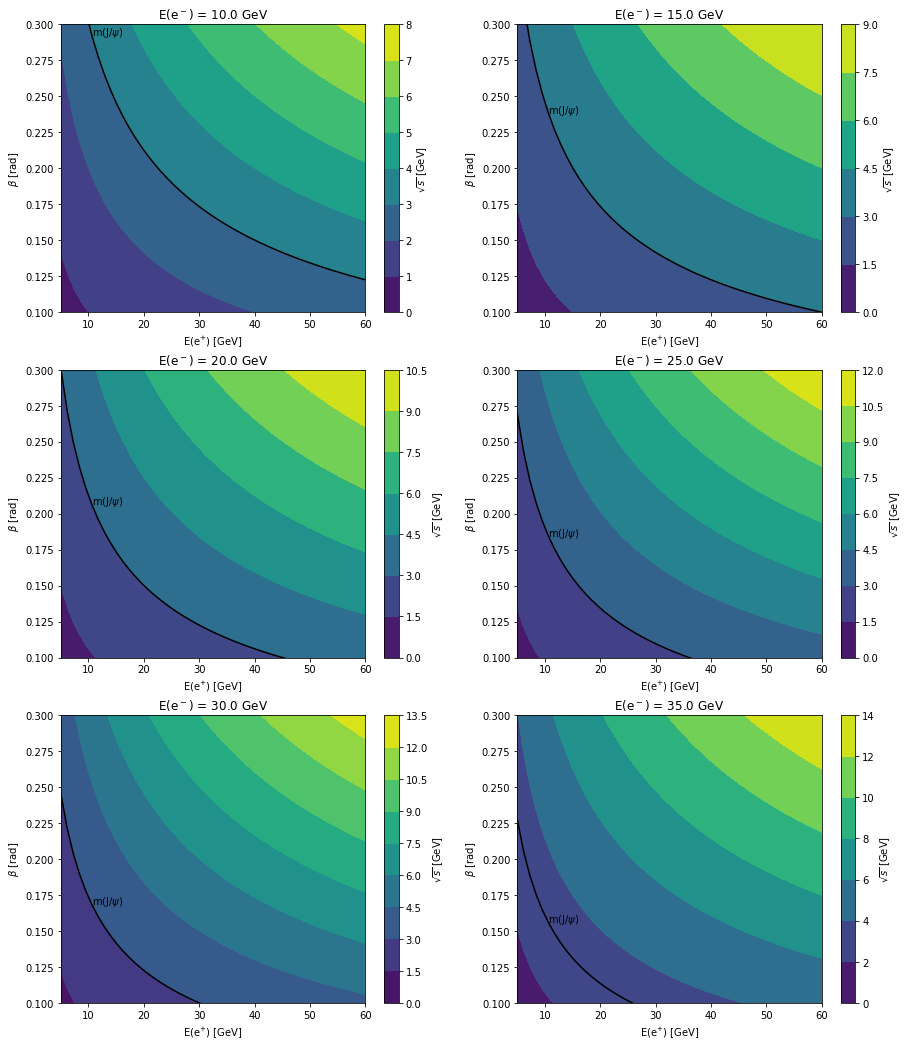

In [2]:
from scipy.constants import pi, c, hbar, fine_structure as alpha
from scipy.optimize import newton

m_e = (0.510998*10**-3) ##[GeV]
m_mu = 206.768 * m_e ##[GeV]
mPsi = 3 ##Y/psi resonance [GeV]

##Function for calculating s
def s(pMinus, pPlus, beta):  #[GeV], [GeV], [rad], [rad]
    return 2*m_e**2 + 2*pPlus*pMinus*(1-cos(beta)) ##[GeV^2]

##Function for calculating t
def t(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    return 2*m_e**2 + 2*m_mu**2 - 2*pMu(pMinus, pPlus, beta, theta)*pPlus*(1-cos(theta)) ##[GeV^2]

##Calculate line of mass in electron/angle plane
EMinus = linspace(10, 35, 6) ##[GeV]
EPlus = linspace(5, 60, 50) ##[GeV]
beta = linspace(0.1, 0.3, 50) ##[rad]

massLine = [newton(lambda b, Ep: s(E_, Ep, b) - mPsi**2, beta, args=(EPlus,)) for E_ in EMinus]

##Plots
EPlusG, betaG = meshgrid(EPlus, beta)
fig, ax = plt.subplots(int(len(EMinus)/2), 2, figsize=(15, 18))
ax = ax.flatten()

for i, E_ in enumerate(EMinus):
    sqrtS = array([sqrt(s(E, E_, t)) for (E, t) in zip(EPlusG, betaG)]) ##[GeV]

    ax[i].set_title(r"E(e$^{Q}$) = {E} GeV".format(Q="-", E=E_))
    ax[i].set_xlabel(r"E(e$^{+}$) [GeV]")
    ax[i].set_ylabel(r"$\beta$ [rad]")
    ax[i].set_ylim(beta[0], beta[-1])

    ax[i].plot(EPlus, massLine[i], color="black")
    ax[i].text(EPlus[5], massLine[i][5], r"m(J/$\psi)$")
    cs = ax[i].contourf(EPlusG, betaG, sqrtS)
    cb =fig.colorbar(cs, ax=ax[i])
    cb.set_label(r"$\sqrt{s}$ [GeV]")

Without loss of generality (because of rotational invariance of the muon decay plane) the kinematic problem can be expressed in the same plane:

$p_{e^+} = \begin{pmatrix}|\vec{p}_{e^+}|\\ 0 \\ |\vec{p}_{e^+}| \\ 0 \end{pmatrix}, \quad p_{e^-} = \begin{pmatrix}|\vec{p}_{e^-}|\\ 0 \\ |\vec{p}_{e^-}|\cos(\beta) \\  |\vec{p}_{e^-}|\sin(\beta) \end{pmatrix}$

$p_{\mu^+} = \begin{pmatrix}|\vec{p}_{\mu^+}|\\ 0 \\ |\vec{p}_{\mu^+}|\cos(\theta) \\ |\vec{p}_{\mu^+}|\sin(\theta)\end{pmatrix}, \quad p_{\\mu^-} = \begin{pmatrix}|\vec{p}_{\mu^-}|\\ 0 \\ p^{y}_{\mu^-} \\ p^{z}_{\mu^-}\end{pmatrix}$

Momentum conservation:

$p_{e^+} + p_{e^-} = p_{\mu^+} + p_{\mu^-}$

This leads to three equation:

I) $|\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + |\vec{p}_{\mu^-}| = |\vec{p}_{\mu^+}| + \sqrt{(p^{y}_{\mu^-})^2 + (p^{z}_{\mu^-})^2 }$

II) $|\vec{p}_{e^+}| + |\vec{p}_{e^-}|\cos(\beta) = |\vec{p}_{\mu^+}|\cos(\theta) + p^{y}_{\mu^-}$
    
$\Rightarrow p^{y}_{\mu^-} = |\vec{p}_{e^+}| + |\vec{p}_{e^-}|\cos(\beta) - |\vec{p}_{\mu^+}|\cos(\theta)$,

III) $|\vec{p}_{e^-}|\sin(\beta) = |\vec{p}_{\mu^+}|\sin(\theta) + p^{z}_{\mu^-}$

$\Rightarrow p^{z}_{\mu^-} = |\vec{p}_{e^-}|\sin(\beta) - |\vec{p}_{\mu^+}|\sin(\theta)$,

Put II) and III) in I)

$|\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + \sqrt{|\vec{p}_{e^+}|^2 + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|\cos(\beta) - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|\cos(\theta) + |\vec{p}_{e^-}|^2\cos^2(\beta) - 2|\vec{p}_{e^-}||\vec{p}_{\mu^+}|\cos(\beta)\cos(\theta) + |\vec{p}_{\mu^+}|^2\cos^2(\theta) + |\vec{p}_{e^-}|^2\sin^2(\beta) - 2|\vec{p}_{e^-}|\vec{p}_{\mu^+}|\sin(\beta)\sin(\theta) + |\vec{p}_{\mu^+}|^2\sin^2(\theta)}$

$\Leftrightarrow |\vec{p}_{e^+}| + |\vec{p}_{e^-}| = |\vec{p}_{\mu^+}| + \sqrt{|\vec{p}_{e^+}|^2 + |\vec{p}_{e^-}|^2 + |\vec{p}_{\mu^+}|^2 - 2|\vec{p}_{e^-}||\vec{p}_{\mu^+}|\cos(\theta - \beta) + 2|\vec{p}_{e^+}||\vec{p}_{e^-}|\cos(\beta) - 2|\vec{p}_{e^+}||\vec{p}_{\mu^+}|\cos(\theta)}$

$\Leftrightarrow |\vec{p}_{\mu^+}| = \frac{|\vec{p}_{e^+}||\vec{p}_{e^-}|(1 - \cos(\beta))}{|\vec{p}_{e^+}|(1 - \cos(\theta)) + |\vec{p}_{e^-}|(1 - \cos(\theta - \beta))}$

So finally the differential cross section in depedence of the scatter angle $\theta$ can be expressed as:

$\frac{d\sigma}{d\cos(\theta)}(e^+e^- \to \mu^+\mu^-) = \frac{d\sigma}{dt}\frac{dt}{d\cos(\theta)} = \frac{d\sigma}{dt}\frac{|\vec{p}_{e^+}|^2|\vec{p}_{e^-}|^3(1-\cos(\beta))(\sin(\beta)\tan(\frac{\theta}{2}) + \cos(\beta) - 1)}{(|\vec{p}_{e^+}|(1 - \cos(\theta)) + |\vec{p}_{e^-}|(1 - \cos(\theta - \beta)))^2}$


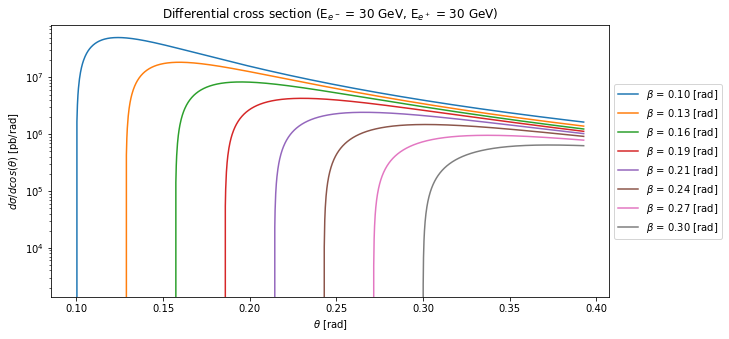

In [3]:
##Function for calculating muon energy
def pMu(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    return pMinus*pPlus*(1-cos(beta))/(pPlus*(1-cos(theta))+pMinus*(1-cos(theta-beta))) ## [GeV]

##Function for calculating cross section
def xSec(pMinus, pPlus, beta, theta): #[GeV], [GeV], [rad], [rad]
    sV = s(pMinus, pPlus, beta)
    tV = t(pMinus, pPlus, beta, theta)
    
    dtdcos = (2*pPlus**2 * pMinus**3 * (1-cos(beta)) * (sin(beta) * tan(theta/2.) + cos(beta) - 1))/(pPlus*(1-cos(theta))+pMinus*(1-cos(theta-beta)))**2
    dsigdt = 2*pi*alpha**2/(sV**3 * (sV - 4*m_e**2) ) * (2*tV**2 + 2*sV*tV + sV**2 - 4*(m_mu**2 + m_e**2)*tV + 2*(m_mu**2 + m_e**2)**2)
    
    return dsigdt * dtdcos * 2.56819*10**9 #[pb]

##Plot
beta = linspace(0.1, 0.3, 8)#rad
E_= 30 #GeV
EPlus = 30 #GeV

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title(r"Differential cross section (E$_{e^-}$ = 30 GeV, E$_{e^+}$ = 30 GeV)")
ax.set_xlabel(r"$\theta$ [rad]")
ax.set_ylabel(r"$d\sigma/dcos(\theta)$ [pb/rad]")
ax.set_yscale('log')

for index, b in enumerate(beta):
    theta = linspace(b, pi/8, 1000) #rad
    sec = [xSec(E_, EPlus, b, angle) for angle in theta]
    ax.plot(theta, sec, label=r"$\beta$ = {:.2f} [rad]".format(b))

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

### Production luminosity with acute annihilation angle

The luminosity can be taken as the luminosity of a circular collider with a modification factor because of the tilted collision instead of head to head collision.

$\mathcal{L} = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\pi\sigma_s\sigma_x}\int\int e^{-x^2(\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\\cos^2(\frac{\beta}{2})}{\sigma^2_s}) -s^2(\frac{\\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}dxds \text{,} \quad \mathcal{L}^{collider} = \frac{N_{e^+}N_{e^-}N_b f}{4\pi\sigma_x\sigma_y}$

$\quad = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\pi\sigma_s\sigma_x}\frac{\sqrt{\pi}}{\sqrt{\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\cos^2(\frac{\beta}{2})}{\sigma^2_s}}}\int e^{-s^2(\frac{\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}ds$

$\quad = \mathcal{L}^{collider}\frac{\sin^2(\frac{\beta}{2})}{\sigma_s\sigma_x\sqrt{(\frac{\sin^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\cos^2(\frac{\beta}{2})}{\sigma^2_s})(\frac{\cos^2(\frac{\beta}{2})}{\sigma^2_x} + \frac{\sin^2(\frac{\beta}{2})}{\sigma^2_s})}}$

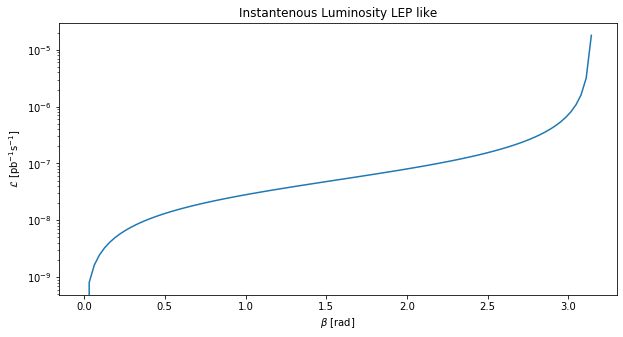

In [4]:
##Function to calculate luminosity
def lumi(n1, n2, nb, f, sigmaX, sigmaY, sigmaS, beta): #[1, 1, 1, 1/s, m, m, m, rad]    
    nomLumi = (n1*n2*nb*f)/(4*pi* sigmaY * sigmaX)
    corrFac = (sin(beta/2)**2)/(sigmaX*sigmaS*sqrt((sin(beta/2)**2/sigmaS**2 + cos(beta/2)**2/sigmaX**2)*(sin(beta/2)**2/sigmaX**2 + cos(beta/2)**2/sigmaS**2)))
    
    return nomLumi * corrFac * 10**(-28) * 10 ** (-12) #[1/(pb*s)]

##Plot
beta = linspace(0, pi, 100)#rad
E_= 30 #GeV
EPlus = 30 #GeV

lum = [lumi(1.7e11, 1.7e11, 7, 11.2e3, 200e-6, 5e-6, 7e-2, b) for b in beta]

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title(r"Instantenous Luminosity LEP like")
ax.set_xlabel(r"$\beta$ [rad]")
ax.set_ylabel(r"$\mathcal{L}$ [pb$^{-1}$s$^{-1}$]")
ax.set_yscale('log')
ax.plot(beta, lum)

### Muon kinematics

The energy of the muons depends only one the scatter angle $\theta$. The figure below shows the initial energy of the muon depends on the initial energy of the electrons.

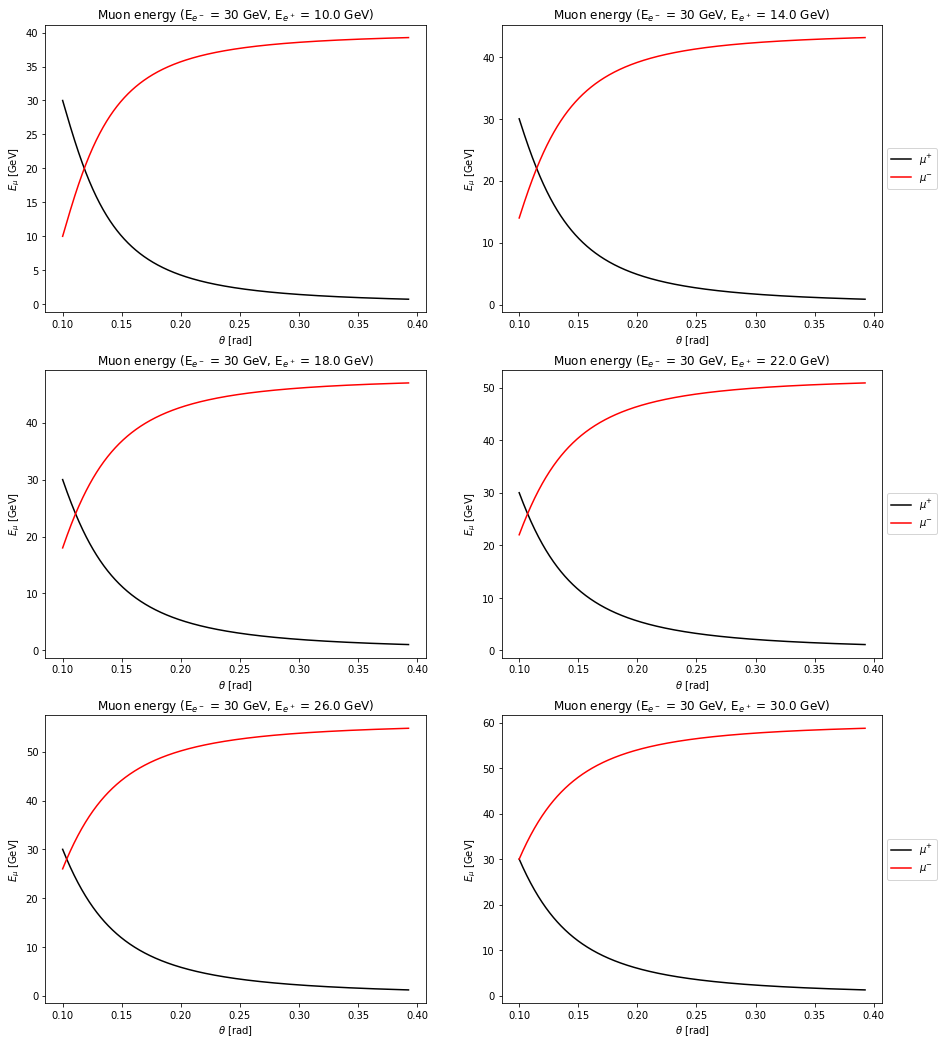

In [5]:
beta = 0.1#rad
theta = linspace(beta, pi/8, 1000) #rad
E_= 30 #GeV

EPlus = linspace(10, 30, 6) #GeV
fig, ax = plt.subplots(int(len(EPlus)/2), 2, figsize=(15, 18))
ax = ax.flatten()

for i, Ep in enumerate(EPlus):
    muP = [pMu(E_, Ep, beta, t) for t in theta]
    mu_ = [E_+ Ep - muE for muE in muP]
    
    ax[i].set_title(r"Muon energy (E$_{e^-}$ = 30 GeV, E$_{e^+}$ =" + " {} GeV)".format(Ep))
    ax[i].set_xlabel(r"$\theta$ [rad]")
    ax[i].set_ylabel(r"$E_{\mu}$ [GeV]")
    ax[i].plot(theta, muP, color="black", label = r"$\mu^{+}$")
    ax[i].plot(theta, mu_, color="red", label = r"$\mu^{-}$")
    if i%2 != 0:
        ax[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))

In the high energy limit the energy of the muon depends energy:

$\tau_{\mu} = \frac{E_{\mu}}{m_{\mu}}$

To calculate the fraction of muons after a time $t$, the exponential distributions has to be used:

$\kappa(E_{\mu}, t) = e^{\frac{t}{\tau_{\mu}}} = e^{\frac{m_{\mu}}{E_{\mu}}t}$

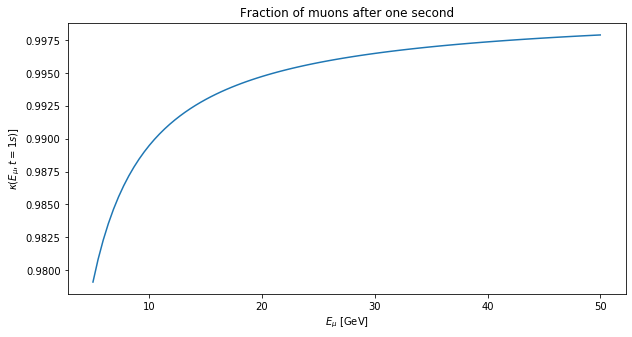

In [6]:
##Function to calculate decay rate of muons
def kappa(Emu, t): ##[GeV, s] 
    return exp(-m_mu/Emu * t)

Emu = linspace(5, 50, 100) ##GeV
k = [kappa(E, 1) for E in Emu]

fig, ax = plt.subplots(figsize=(10, 5))
ax.set_title(r"Fraction of muons after one second")
ax.set_xlabel(r"$E_{\mu}$ [GeV]")
ax.set_ylabel(r"$\kappa(E_{\mu}, t=1s)$]")
ax.plot(Emu, k)

### Expected muon production rate

To calculate the event yield expected from this configuration, the differential cross section has to be multiplied with the insteanous luminosity and the fraction of muons after one second:

$\frac{dN}{dt} = \kappa(E_{\mu}, t=1s) \cdot \mathcal{L} \cdot \frac{d\sigma}{d\cos(\theta)}$

The figure below shows the expected event yield for a LEP like and a SuperKEKB like collision parameter of the electrons.

No handles with labels found to put in legend.


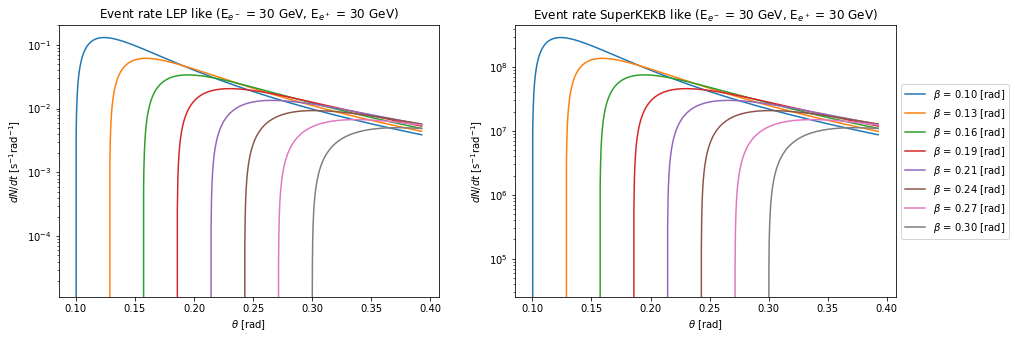

In [7]:
beta = linspace(0.1, 0.3, 8) ##[rad]
    
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
lumLEP = [lumi(1.7e11, 1.7e11, 7, 11.2e3, 200e-6, 5e-6, 7e-2, b) for b in beta]
lumKEK = [lumi(6e10, 6e10, 2500, 500e6, 10e-6, 62e-9, 5e-3, b) for b in beta]

E_ = 30 
EPlus = 30

for i, (lum, name) in enumerate(zip([lumLEP, lumKEK], ["LEP like", "SuperKEKB like"])):
    ax[i].set_title(r"Event rate {}".format(name) + " (E$_{e^-}$ = 30 GeV, E$_{e^+}$ = 30 GeV)")
    ax[i].set_xlabel(r"$\theta$ [rad]")
    ax[i].set_ylabel(r"$dN/dt$ [s$^{-1}$rad$^{-1}$]")
    ax[i].set_yscale('log')

    for index, b in enumerate(beta):
        theta = linspace(b, pi/8, 1000) #rad
        Ep = [pMu(E_, EPlus, b, t) for t in theta]
        k = [kappa(E, 1) for E in Ep]
        sec = [xSec(E_, EPlus, b, t) for t in theta]
        N = [s*frac*lum[index] for s, frac in zip(sec, k)]

        ax[i].plot(theta, N, label=r"$\beta$ = {:.2f} [rad]".format(b))

    ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))